In [2]:
import pandas as pd
import numpy as np
from scipy import stats

# Define the file path to your CSV file
# file_path = r'C:\Users\ADMIN\Desktop\Macquarie/Semester 3/BUSA 8001/BUSA8001_Assignment2/data/data.csv'

file_path = "/Users/a12345/Documents/Github/8001Assignment2/data.csv"

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

In [3]:
data.head()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,1,1,39,2,130568,1,2
1,0,0,29,1,80315,0,0
2,1,0,35,0,107067,0,0
3,0,1,56,2,214000,1,0
4,1,1,45,2,158138,1,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           2000 non-null   int64
 1   Marital Status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement Size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [5]:
# Check for missing values in each column
data.isnull().sum()

Gender             0
Marital Status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement Size    0
dtype: int64

In [6]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 3


In [7]:
# Remove duplicates
data_cleaned = data.drop_duplicates()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           1997 non-null   int64
 1   Marital Status   1997 non-null   int64
 2   Age              1997 non-null   int64
 3   Education        1997 non-null   int64
 4   Income           1997 non-null   int64
 5   Occupation       1997 non-null   int64
 6   Settlement Size  1997 non-null   int64
dtypes: int64(7)
memory usage: 124.8 KB


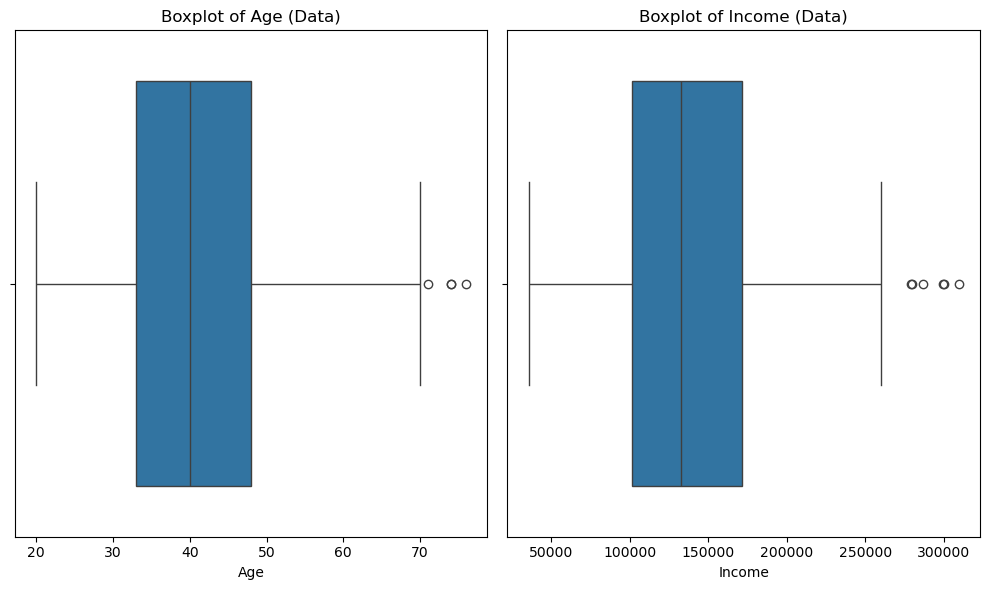

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns to visualize
numeric_columns = ['Age', 'Income'] 

# Create boxplots to visualize outliers in the data
plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column} (Data)')
    
plt.tight_layout()
plt.show()

In [9]:
# Calculate the IQR for numeric columns
Q1 = data_cleaned[numeric_columns].quantile(0.25)
Q3 = data_cleaned[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a mask to keep only rows within the bounds (i.e., without outliers)
mask = ~((data_cleaned[numeric_columns] < lower_bound) | (data_cleaned[numeric_columns] > upper_bound)).any(axis=1)

# Remove outliers from the dataset
data_cleaned = data_cleaned[mask]

# View the cleaned dataset without outliers
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           1991 non-null   int64
 1   Marital Status   1991 non-null   int64
 2   Age              1991 non-null   int64
 3   Education        1991 non-null   int64
 4   Income           1991 non-null   int64
 5   Occupation       1991 non-null   int64
 6   Settlement Size  1991 non-null   int64
dtypes: int64(7)
memory usage: 124.4 KB


           Age     Income
count  1991.00    1991.00
mean     40.73  137061.97
std       9.31   45481.28
min      20.00   35832.00
25%      33.00  101189.50
50%      40.00  132901.00
75%      48.00  171019.00
max      66.00  260137.00


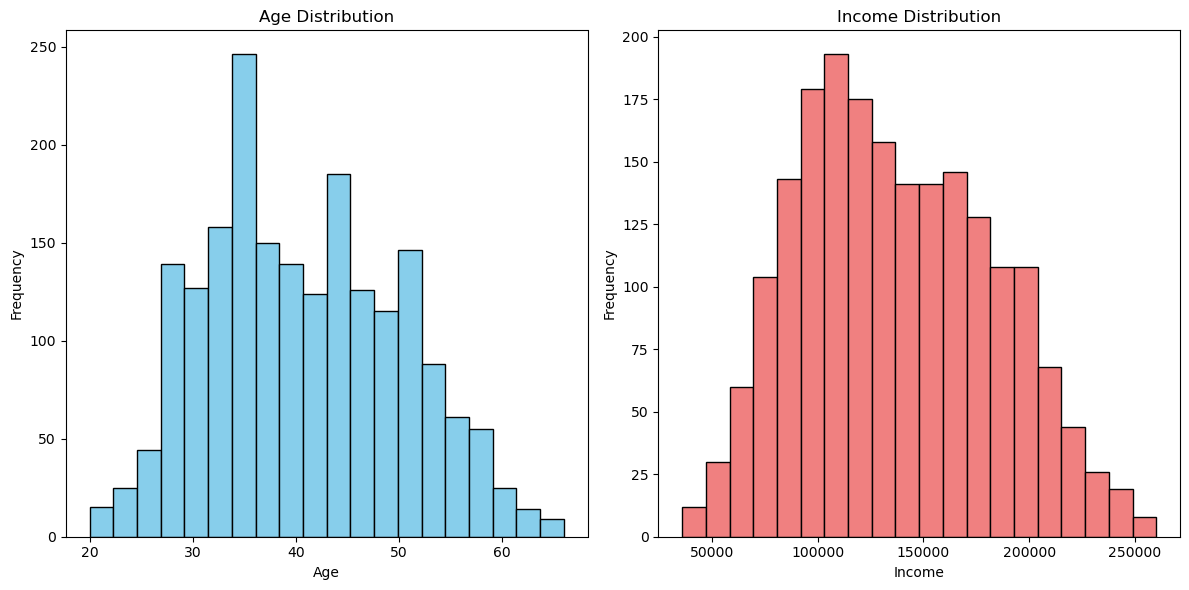

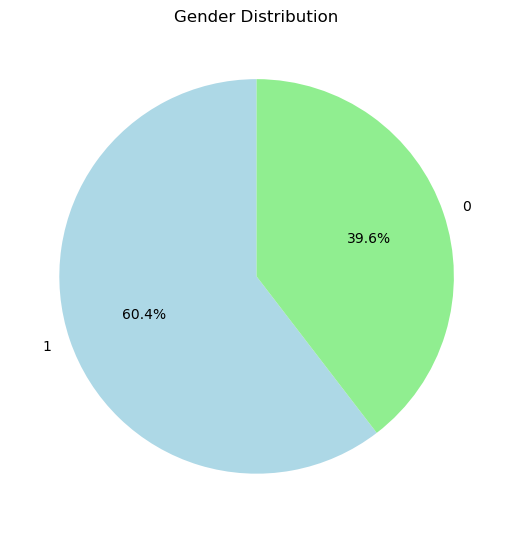

In [10]:
# Summary statistics (Age, Income)
summary_statistics = data_cleaned[['Age', 'Income']].describe()
print(summary_statistics.round(2))

# Categorical columns (Gender, Marital Status, Occupation)
gender_counts = data_cleaned['Gender'].value_counts()
marital_status_counts = data_cleaned['Marital Status'].value_counts()
occupation_counts = data_cleaned['Occupation'].value_counts()

# Visualize Histograms (Age, Income)
plt.figure(figsize=(12, 6))

# Histogram for Age
plt.subplot(1, 2, 1)
plt.hist(data_cleaned['Age'], bins=20, edgecolor='black', color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for Income
plt.subplot(1, 2, 2)
plt.hist(data_cleaned['Income'], bins=20, edgecolor='black', color='lightcoral')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('age_distribution.png', format='png')
plt.show()


# Step 4: Pie chart for categorical columns (Gender, Marital Status)
plt.figure(figsize=(14, 7))

# Pie chart for Gender
plt.subplot(1, 2, 1)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Gender Distribution')

plt.savefig('pie.png', format='png')
plt.show()

# # Optional: Print frequency counts for categorical columns
# print("Gender distribution:\n", gender_counts)
# print("\nMarital Status distribution:\n", marital_status_counts)
# print("\nOccupation distribution:\n", occupation_counts)

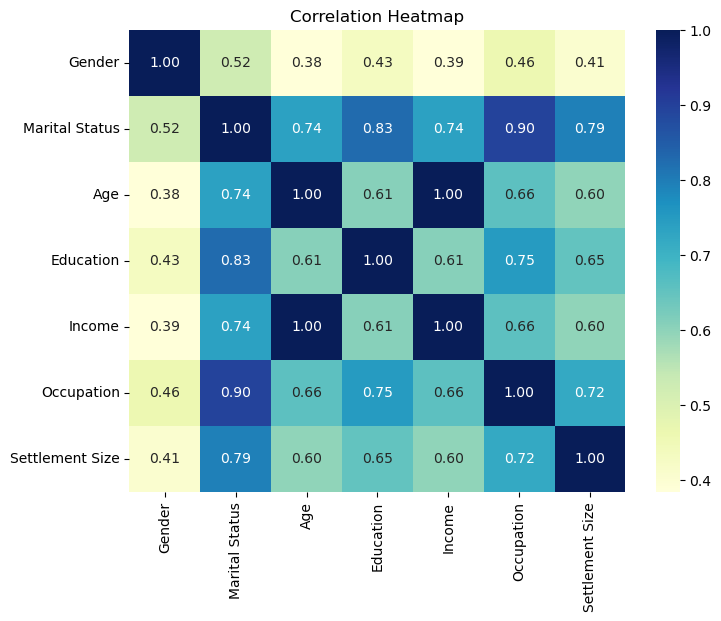

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the correlation matrix for numeric columns
correlation_matrix = data_cleaned.corr()

# Step 2: Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

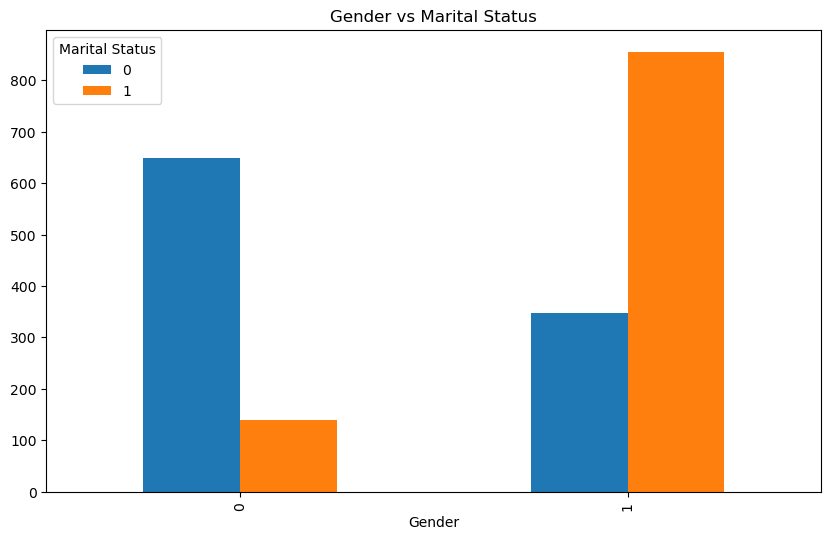

In [12]:
pd.crosstab(data_cleaned['Gender'], data_cleaned['Marital Status']).plot(kind='bar', figsize=(10, 6))
plt.title('Gender vs Marital Status')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

# Standardizing the numeric columns (Age and Income)
scaler = StandardScaler()
data_cleaned[['Age', 'Income']] = scaler.fit_transform(data_cleaned[['Age', 'Income']])

# Rounding the standardized data to 2 decimal places
data_cleaned[['Age', 'Income']] = data_cleaned[['Age', 'Income']].round(2)

print("Standardized Data:")
print(data_cleaned[['Age', 'Income']].head())


Standardized Data:
    Age  Income
0 -0.19   -0.14
1 -1.26   -1.25
2 -0.62   -0.66
3  1.64    1.69
4  0.46    0.46


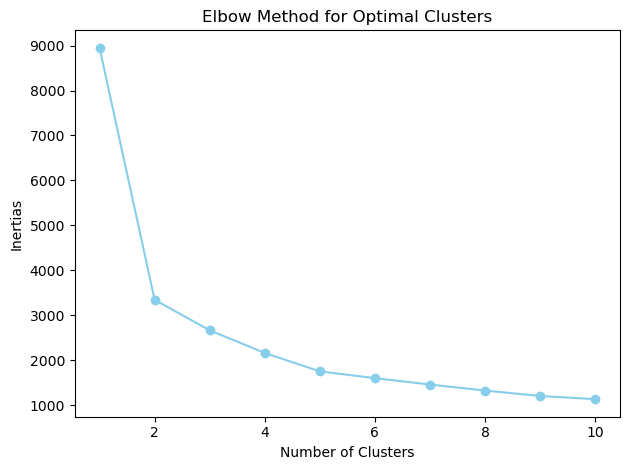

In [14]:
from sklearn.cluster import KMeans
# Elbow method to find the optimal number of clusters
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_cleaned)
    inertias.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertias, marker='o', color='skyblue')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertias')
plt.tight_layout()
plt.savefig('elbow.png', format='png')
plt.show()


In [15]:
from sklearn.metrics import silhouette_score

# Silhouette Scores for different number of clusters
for n_clusters in range(2, 6):  # Trying cluster sizes from 2 to 5
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(data_cleaned)
    
    silhouette_avg = silhouette_score(data_cleaned, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")


For n_clusters = 2, the silhouette score is 0.5457737357694361
For n_clusters = 3, the silhouette score is 0.43335416024489626
For n_clusters = 4, the silhouette score is 0.453843468779997
For n_clusters = 5, the silhouette score is 0.3424707494810806


For n_clusters = 2, the average silhouette score is 0.55


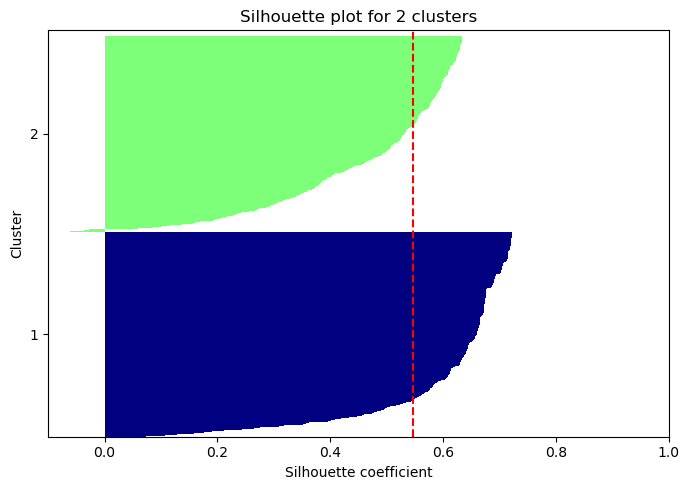

For n_clusters = 3, the average silhouette score is 0.43


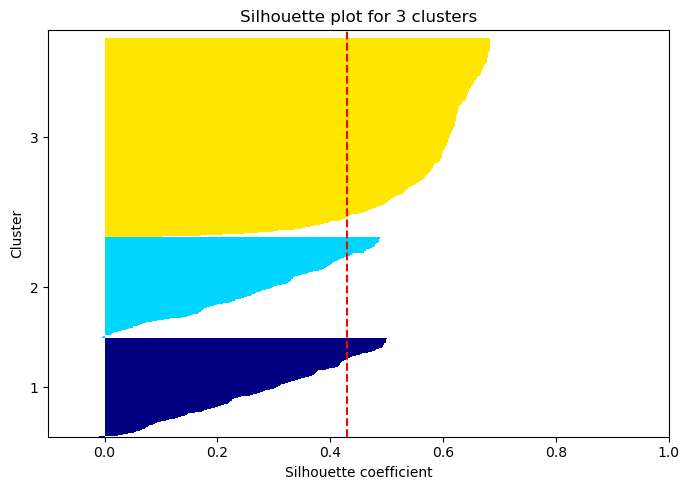

For n_clusters = 4, the average silhouette score is 0.45


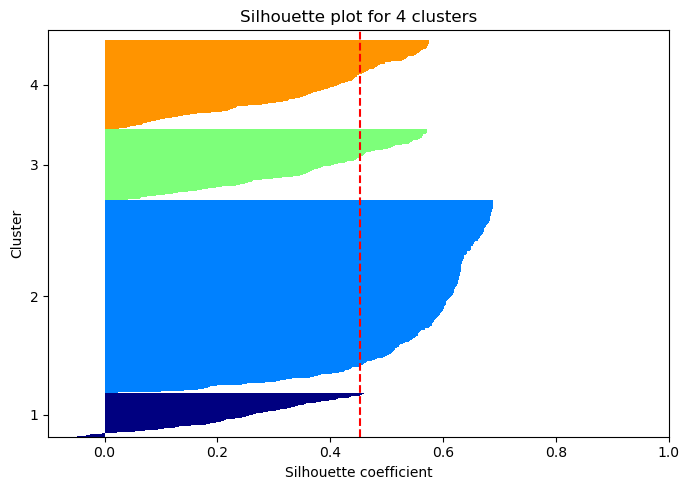

In [16]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

# Function to plot silhouette for a given number of clusters
def plot_silhouette(n_clusters, data_cleaned):
    km = KMeans(n_clusters=n_clusters,  
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)

    y_km = km.fit_predict(data_cleaned)
    cluster_labels = np.unique(y_km)
    silhouette_vals = silhouette_samples(data_cleaned, y_km, metric='euclidean')

    # Set up the figure and axes
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(7, 5)

    # Silhouette coefficient ranges from -1 to 1
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_cleaned) + (n_clusters + 1) * 10])

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        ax1.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    print(f'For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.2f}')

    plt.axvline(silhouette_avg, color="red", linestyle="--")  # Plot vertical average line
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.title(f'Silhouette plot for {n_clusters} clusters')

    plt.tight_layout()
    plt.show()

# Loop to plot silhouette plots for 2 to 4 clusters
for n_clusters in [2,3,4]:
    plot_silhouette(n_clusters, data_cleaned)


In [17]:
from sklearn.cluster import KMeans

# Apply K-means++ with 2 clusters using the selected columns
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
data_cleaned['KMeans_Cluster'] = kmeans.fit_predict(data_cleaned)

# View the first few rows with cluster assignments
data_cleaned.head()


,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,KMeans_Cluster
0,1,1,-0.19,2,-0.14,1,2,0
1,0,0,-1.26,1,-1.25,0,0,1
2,1,0,-0.62,0,-0.66,0,0,1
3,0,1,1.64,2,1.69,1,0,0
4,1,1,0.46,2,0.46,1,2,0


In [18]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with 2 clusters using the selected columns
agg_cluster = AgglomerativeClustering(n_clusters=2)
data_cleaned['Agg_Cluster'] = agg_cluster.fit_predict(data_cleaned)

data_cleaned.head(20)

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,KMeans_Cluster,Agg_Cluster
0,1,1,-0.19,2,-0.14,1,2,0,0
1,0,0,-1.26,1,-1.25,0,0,1,1
2,1,0,-0.62,0,-0.66,0,0,1,1
3,0,1,1.64,2,1.69,1,0,0,0
4,1,1,0.46,2,0.46,1,2,0,0
5,0,0,-0.08,1,-0.04,0,0,1,1
6,1,1,0.89,2,0.92,1,0,0,0
7,1,1,1.32,3,1.31,1,2,0,0
8,0,0,-0.08,1,-0.12,0,0,1,1
9,1,1,1.43,2,1.46,1,0,0,0


In [19]:
from sklearn.preprocessing import StandardScaler

# Reverse the scaling (inverse transform) and reassign the original values to the 'Age' and 'Income' columns
data_cleaned[['Age', 'Income']] = scaler.inverse_transform(data_cleaned[['Age', 'Income']])

data_cleaned.head()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,KMeans_Cluster,Agg_Cluster
0,1,1,38.961850,2,130696.191661,1,2,0,0
1,0,0,28.999931,1,80224.652534,0,0,1,1
2,1,0,34.958462,0,107051.867025,0,0,1,1
3,0,1,55.999524,2,213906.026440,1,0,0,0
4,1,1,45.013483,2,157978.104703,1,2,0,0


In [20]:
# K-Means++ profile
kmeans_profiles = data_cleaned.drop(columns=['Agg_Cluster']).groupby('KMeans_Cluster').mean()

# K-means++ cluster profiles without 'Agg_Cluster'
print(kmeans_profiles.to_string(index=True, max_cols=None))

# Print the count of data points in each K-means++ cluster
print("\nNumber of data points in each K-means++ cluster:")
print(data_cleaned['KMeans_Cluster'].value_counts())

# For Agglomerative Clustering profiles
agg_profiles = data_cleaned.drop(columns=["KMeans_Cluster"]).groupby('Agg_Cluster').mean()

# Agglomerative Clustering profiles 
print(agg_profiles.to_string(index=True, max_cols=None))

print("\nNumber of data points in each Agglomerative Clustering cluster:")
print(data_cleaned['Agg_Cluster'].value_counts())

                  Gender  Marital Status        Age  Education         Income  Occupation  Settlement Size
KMeans_Cluster                                                                                            
0               0.854639        0.991753  48.028933   2.102062  172731.900770    1.213402         1.637113
1               0.366308        0.032321  33.794914   0.840353  103184.479939    0.039177         0.070519

Number of data points in each K-means++ cluster:
KMeans_Cluster
1    1021
0     970
Name: count, dtype: int64
               Gender  Marital Status        Age  Education         Income  Occupation  Settlement Size
Agg_Cluster                                                                                            
0            0.855015        0.987090  47.584837   2.089374  170565.172031    1.206554         1.587885
1            0.347561        0.001016  33.714168   0.805894  102786.757652    0.002033         0.061992

Number of data points in each Agglomerative 

In [21]:
# Create a boolean mask for where the KMeans cluster assignment matches the Agglomerative Clustering assignment
matching_clusters = np.where(data_cleaned['KMeans_Cluster'] == data_cleaned['Agg_Cluster'], 1, 0)

# Calculate the total number of matching assignments
num_matching = np.sum(matching_clusters)

# Calculate the total number of data points
total_data_points = len(data_cleaned)

# Calculate the overlap percentage
overlap_percentage = (num_matching / total_data_points) * 100

# Print the result
print(f"Overlap percentage between K-means++ and Agglomerative Clustering: {overlap_percentage:.2f}%")


Overlap percentage between K-means++ and Agglomerative Clustering: 98.14%
